# Churn Modelling
- A predictive churn model extrapolates on existing data to show future potential churn rates.
- The project focuses on building a Machine learning model for a particular firm or a bank to predict based on certain features if based on certain features or characteristics of an individual, whether he/she will continue to take the services from the firm or not. The project may help firms to focus on certain factors that can lead the customers to discontinue so focusing on the factors may cause the firm to reduce the customers discontuining the services, Increasing the customer base and thereby working effectively and hence increasing the profits of the firm


In [1]:
##Loading the required libraries for the project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
#Loading the data fi
df = pd.read_csv('trial_churn.csv')

In [3]:
##This enables all the columns in the dataset to be visible
pd.pandas.set_option('display.max_columns',None)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#the most initial step : Checking for Null values
##No null values found in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
##Getting the numerical and categorical features
num = [x for x in df.columns if df[x].dtypes!='O']
cate = [x for x in df.columns if df[x].dtypes == 'O']

In [11]:
##We can see that we have 3 categorical features
'''
Here, Surname, the categorical features stands least important to determine the churn. 
Hence Surname is being dropped and is not being encoded
 '''
df.drop('Surname',axis = 1,inplace = True)
num,cate


(['RowNumber',
  'CustomerId',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Exited'],
 ['Surname', 'Geography', 'Gender'])

In [13]:
df.drop('RowNumber',axis = 1,inplace = True)

In [15]:
df.drop('CustomerId',axis = 1,inplace = True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


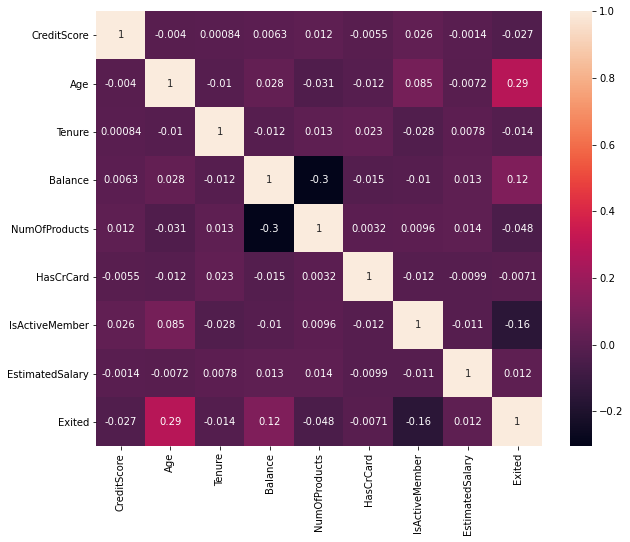

In [22]:
##A correlation heatmap to visualize whether there exists a correlation between the existing features or whether there is
##multicollinearity amongst features. 
##The more the color is lighter the more is positive correlation and the darker is the negative the correlation is
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (10,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot = True)
plt.show()

From above heatmap, we can see that for Exited(Whether the customer has exited or is present) Age, Balance and EstimatedSalary has a positive correlation and other existing features have negative correation 

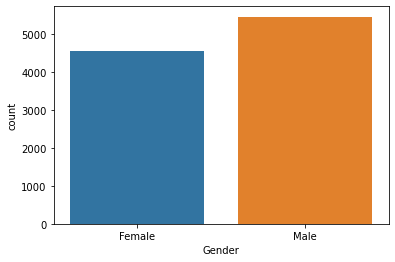

In [29]:
#Mostly the population for the bank consists of male 
sns.countplot(df.Gender)

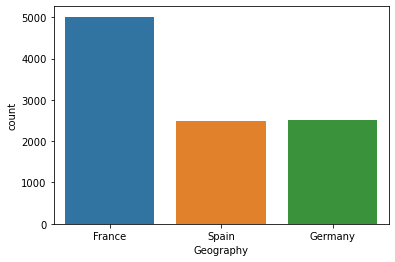

In [30]:
##people in the bank are mostly from france compared to spain and germany
#Also people from germany and Spain are nearly in equal amounts
sns.countplot(df.Geography)

In [25]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [26]:
##Encoding the Categorical features as the Machine Learning model requires Numerical features to be given as input. 
##Since the maximum num of categories present in 3 we can use ONe hot encoding 
##If more than 3 categories then Label Encoding is being done. 
gen = pd.get_dummies(df['Gender'],drop_first = True)
geo = pd.get_dummies(df['Geography'],drop_first = True)

In [27]:
df = pd.concat([df,gen,geo],axis = 1)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [31]:
df.drop(['Geography','Gender'],axis = 1,inplace = True)

In [32]:
##splitting the target variable and Features
X = df.drop('Exited',axis = 1)
y = df['Exited']

[0.13424733 0.23681227 0.10520903 0.13309034 0.14251435 0.02033699
 0.03480956 0.1343761  0.01689548 0.02847643 0.01323212]


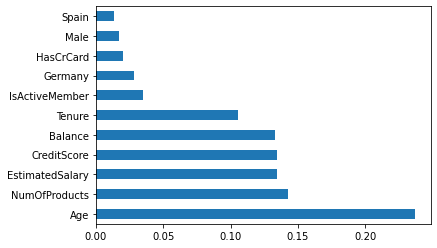

<Figure size 720x720 with 0 Axes>

Age                0.236812
NumOfProducts      0.142514
EstimatedSalary    0.134376
CreditScore        0.134247
Balance            0.133090
Tenure             0.105209
IsActiveMember     0.034810
Germany            0.028476
HasCrCard          0.020337
Male               0.016895
Spain              0.013232
dtype: float64


In [33]:
##A model to get important features from the available ones to avoid extra and less important features
mdl_fs = ExtraTreesClassifier()
mdl_fs.fit(X,y)
print(mdl_fs.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(mdl_fs.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.figure(figsize = (10,10))
plt.show()
s = feat_importances.nlargest(27)
print(s)

<h3>From the above Feature Importance Visualization we can easily see which feature has more contribution in determining the final class of the particular entry</h3>

<h4>Thus we can take out some of the relevant features and hence make a good model for prediction. 
This step could be called as *Feature Selection* step in the project </h4>

In [35]:
##The final list of features been considered for modelling
X1 = df[['Age','NumOfProducts','EstimatedSalary','CreditScore','Balance','Tenure']]

In [36]:
## Splitting the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size = 0.2)

In [50]:
mdl1 = RandomForestClassifier(min_samples_leaf = 2)
mdl1.fit(X_train,y_train)
mdl1.score(X_test,y_test)

0.852

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,mdl1.predict(X_test))

array([[1549,   59],
       [ 237,  155]], dtype=int64)

In [51]:
##The classification report in order to check if the model performs well 
from sklearn.metrics import classification_report
print(classification_report(y_test,mdl1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1608
           1       0.72      0.40      0.51       392

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



In [93]:
##Cross validation performed to get an overall view to see the limits of accuracy of the model. 
from sklearn.model_selection import cross_val_score
score = cross_val_score(mdl1,X,y,cv = 10)
print('Minimum model score : ',np.min(score))
print('Average model score : ',np.mean(score))
print('Maximum model score : ',np.max(score))

Minimum model score :  0.856
Average model score :  0.8644999999999999
Maximum model score :  0.873


In [85]:
mdl2 = XGBClassifier(colsample_bytree=0.1,learning_rate=0.2)
mdl2.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
mdl2.score(X_test,y_test)

0.855

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,mdl2.predict(X_test))

array([[1551,   57],
       [ 233,  159]], dtype=int64)

In [87]:
##The classification report in order to check if the model performs well 
from sklearn.metrics import classification_report
print(classification_report(y_test,mdl2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1608
           1       0.74      0.41      0.52       392

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



In [92]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(mdl2,X,y,cv = 10)
print('Minimum model score : ',np.min(score))
print('Average model score : ',np.mean(score))
print('Maximum model score : ',np.max(score))

Minimum model score :  0.842
Average model score :  0.852
Maximum model score :  0.869


In [90]:
##LogisticRegression a linear model
m3 = LogisticRegression()
m3.fit(X_train,y_train)
m3.score(X_test,y_test)

0.7925

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,m3.predict(X_test))

array([[1568,   40],
       [ 375,   17]], dtype=int64)

<h3>From the above 3 models, looking at the confusion matrices it can be easily seen that the First model(RandomForestClassifier) performs well on the data and can be considered for implementation </h3>
<h3>The insight and the decision being made for the model for implementation is done completely based on both classification report and confusion matrix and the Cross validation scores overally</h3>